<a id="top"></a>
# O\*NET Analysis and Classification
---

The O\*NET Program is the United States' primary source of occupational information. Valid data are essential to understanding the rapidly changing nature of work and how it impacts the workforce and U.S. economy.

In this project, I look at abilities, skills and tech skills data from O\*NET. Specifically, I look at some of the most in-demand skills and abilities for jobs and also what jobs require high levels of both skills and abilities. I also train a classifier to predict around 500 random LinkedIn job titles and match them with SOC (Standard Occupational Classification) codes, which is how O\*NET classifies jobs.

## Contents
---

**1.  [Summary of Findings](#summary_of_findings)** <br>
**2.  [Statistical Summary of Models](#statistical_summary)** <br>
**3.  [About the Data](#about_the_data)** <br>
**4.  [Individual Analysis](#individual_analysis)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**4.1.  [Abilities](#abilities)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**4.2.  [Skills](#skills)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**4.3.  [Tech Skills](#tech_skills)** <br>
**5.  [Analysis on Abilities, Skills, and Tech Skills](#abilities_skills_tech)** <br>
**6.  [Analysis Conclusion](#analysis_conclusion)** <br>
**7.  [Classification](#classification)** <br>
**8.  [Model Training](#model_training)** <br>
**9.  [Model Summary](#model_summary)** <br>
**10.  [Predicting LinkedIn Job Titles](#linkedin_predictions)** <br>
**11.  [Conclusion and Recommendations](#conclusion_and_recommendations)** <br>

<a id="summary_of_findings"></a>
## 1. Summary of Findings
---

* Active listening, speaking and critical thinking were the top three skills that jobs most often require.


* Microsoft software such as Excel, Word, etc. makes up over a third of the top 30 tech skills that jobs require.


* Jobs which fall under Software Developers (for applications) require the most varied skillset.  

<a id="statistical_summary"></a>
## 2. Statistical Summary of Models
---

| <br><br>Models | <br>Best TfidfVectorized<br>Precision Score | <br>Best CountVectorized<br>Precision Score |
| :- | :-: | :-: |
| Naive Bayes | 0.50 | 0.52 |
| SVC (one-vs-one) | 0.43 | 0.52 |
| LinearSVC (one-vs-rest) | 0.49 | **0.55** |
| SGDClassifier | 0.41 | 0.49 |
| Logistic Regression | 0.49 | 0.54 |

<a id="about_the_data"></a>
## 3. About the Data
---

Central to the project is the O\*NET database, containing hundreds of standardized and occupation-specific descriptors on almost 1,000 occupations covering the entire U.S. economy. The database, which is available to the public at no cost, is continually updated from input by a broad range of workers in each occupation.

O\*NET information is used by millions of individuals every year, including those taking advantage of O\*NET Online, My Next Move, and other publicly and privately developed applications. The data have proven vital in helping people find the training and jobs they need, and employers the skilled workers necessary to be competitive in the marketplace.

The Occupational Information Network (O\*NET) is developed under the sponsorship of the U.S. Department of Labor/Employment and Training Administration (USDOL/ETA) through a grant to the North Carolina Department of Commerce.

To find out more about O\*NET, visit: [O\*NET OnLine](https://www.onetonline.org/) and [O\*NET Resource Center](https://www.onetcenter.org/)

For SOC-labeled data, visit: [U.S. Census Bureau](https://www.census.gov/topics/employment/industry-occupation/guidance/code-lists.html) and [U.S. Bureau of Labor Statistics](https://www.bls.gov/soc/2018/)

<a id="individual_analysis"></a>
## 4. Individual Analysis
---

#### Imports and Data Reading

In [3]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Set styles and colours for seaborn plots
sns.set(style="darkgrid", palette="muted", font_scale=1)
palette = sns.color_palette("tab10")

In [4]:
# Read the data
abilities = pd.read_csv('data/abilities.csv')
skills = pd.read_csv('data/skills.csv')
tech_skills = pd.read_csv('data/technology_skills.csv')

<a id="abilities"></a>
### 4.1. Abilities

#### Data Checking & Cleaning

In [5]:
# Abilities
abilities.head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,IM,Importance,4.50,8.0,0.19,4.13,4.87,N,NaN,07/2014,Analyst
1,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,LV,Level,4.88,8.0,0.13,4.63,5.12,N,N,07/2014,Analyst
2,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,IM,Importance,4.25,8.0,0.16,3.93,4.57,N,NaN,07/2014,Analyst
3,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,LV,Level,4.62,8.0,0.18,4.27,4.98,N,N,07/2014,Analyst
4,11-1011.00,Chief Executives,1.A.1.a.3,Oral Expression,IM,Importance,4.38,8.0,0.18,4.02,4.73,N,NaN,07/2014,Analyst


In [6]:
# Check shape
abilities.shape

(100672, 15)

In [7]:
# Remove one of the measurement scales
abilities = abilities[abilities['Scale Name'] != 'Level']

# Check to see if any of the data is recommended to be suppressed
any(abilities['Recommend Suppress'] == 'Y')

False

In [8]:
# Keep only necessary columns
abilities = abilities[['Title', 'Element Name', 'Data Value']]

# Rename columns for simplicity
abilities = abilities.rename(columns={
    'Title':'title',
    'Element Name': 'ability', 
    'Data Value': 'ability_value'
})

# Check for null values
abilities.isnull().sum()

title            0
ability          0
ability_value    0
dtype: int64

In [9]:
# Check data types
abilities.dtypes

title             object
ability           object
ability_value    float64
dtype: object

In [10]:
# Total number of unique job titles
abilities['title'].nunique()

968

In [11]:
# Check amount of elements per job title
abilities['title'].value_counts()

First-Line Supervisors of Correctional Officers    52
Labor Relations Specialists                        52
Dentists, General                                  52
Respiratory Therapy Technicians                    52
Crossing Guards                                    52
                                                   ..
Materials Engineers                                52
Mine Cutting and Channeling Machine Operators      52
Computer Operators                                 52
Animal Trainers                                    52
First-Line Supervisors of Retail Sales Workers     52
Name: title, Length: 968, dtype: int64

In [12]:
# Check if there are any job titles that do not have the same number of elements
any(abilities['title'].value_counts() != 52)

False

#### EDA

In [13]:
# All jobs that require an ability with a score of over 4.8
abilities[abilities['ability_value'] > 4.8].sort_values('ability_value', ascending=False)

,title,ability,ability_value
14374,Mathematical Technicians,Mathematical Reasoning,5.00
14376,Mathematical Technicians,Number Facility,5.00
41924,Anesthesiologists,Problem Sensitivity,5.00
42028,Family and General Practitioners,Problem Sensitivity,5.00
42236,Obstetricians and Gynecologists,Problem Sensitivity,5.00
42328,"Pediatricians, General",Oral Comprehension,5.00
29436,Lawyers,Oral Expression,4.88
33178,"English Language and Literature Teachers, Post...",Written Comprehension,4.88
39316,Radio and Television Announcers,Oral Expression,4.88
39834,Editors,Written Comprehension,4.88


Here we can see that Mathematical Technicians generally need to have a high level of ability in areas such as mathematical reasoning whereas those who work in healthcare tend to have a high level of ability in problem sensitivity.

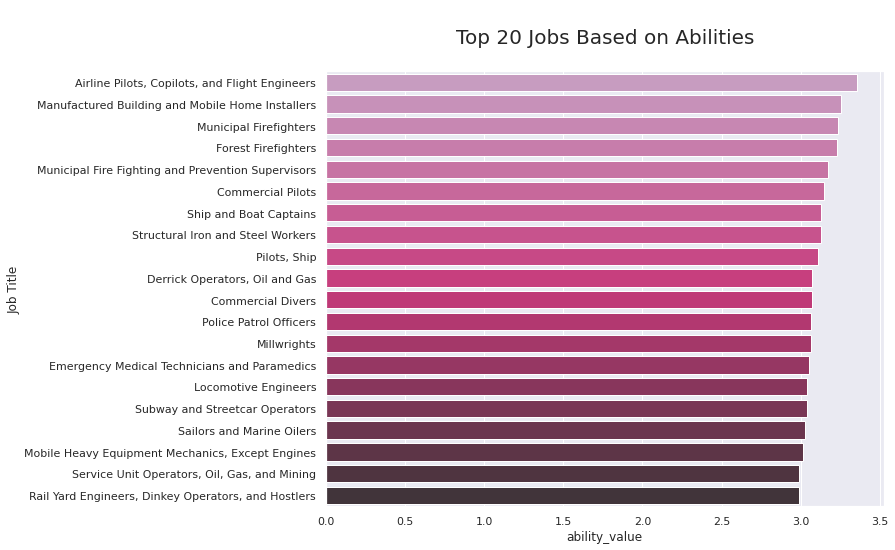

In [14]:
# Top 20 jobs based on all abilities
abilities_grouped = pd.DataFrame(abilities.groupby('title')['ability_value'].mean()).reset_index()
abilities_grouped.sort_values(by='ability_value', ascending=False, inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x='ability_value', y='title',data=abilities_grouped[:20], palette="PuRd_d")
plt.title('\nTop 20 Jobs Based on Abilities\n', fontsize=20)
plt.ylabel('Job Title');

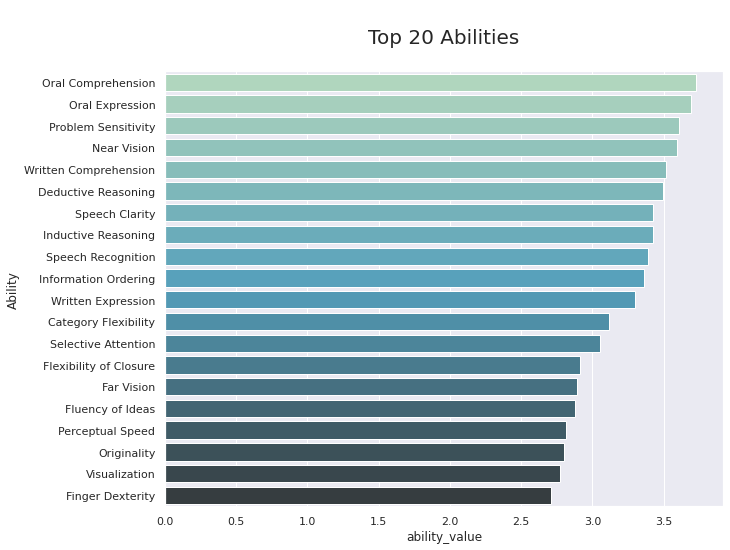

In [15]:
# Top 20 abilities
abilities_grouped2 = pd.DataFrame(abilities.groupby('ability')['ability_value'].mean()).reset_index()
abilities_grouped2.sort_values(by='ability_value', ascending=False, inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x='ability_value', y='ability', data=abilities_grouped2[:20], palette="GnBu_d")
plt.title('\nTop 20 Abilities\n', fontsize=20)
plt.ylabel('Ability');

<a id="skills"></a>
### 4.2. Skills

#### Data Checking & Cleaning

In [16]:
# Skills
skills.head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
1,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,LV,Level,4.75,8.0,0.16,4.43,5.07,N,N,07/2014,Analyst
2,11-1011.00,Chief Executives,2.A.1.b,Active Listening,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
3,11-1011.00,Chief Executives,2.A.1.b,Active Listening,LV,Level,4.88,8.0,0.23,4.43,5.32,N,N,07/2014,Analyst
4,11-1011.00,Chief Executives,2.A.1.c,Writing,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,07/2014,Analyst


In [17]:
# Check shape
skills.shape

(67760, 15)

In [18]:
# Remove one of the measurement scales
skills = skills[skills['Scale Name'] != 'Level']

# Check to see if any of the data is recommended to be suppressed
any(skills['Recommend Suppress'] == 'Y')

False

In [19]:
# Keep only relevant columns
skills = skills[['Title', 'Element Name', 'Data Value']]

# Rename columns for simplicity
skills = skills.rename(columns={
    'Title':'title',
    'Element Name': 'skill', 
    'Data Value': 'skill_value'
})

# Check for null values
skills.isnull().sum()

title          0
skill          0
skill_value    0
dtype: int64

In [20]:
# Check data types
skills.dtypes

title           object
skill           object
skill_value    float64
dtype: object

In [21]:
# Total number of unique job titles
skills['title'].nunique()

968

In [22]:
# Check amount of elements per job
skills['title'].value_counts()

First-Line Supervisors of Correctional Officers                                35
Education Teachers, Postsecondary                                              35
Statement Clerks                                                               35
Web Administrators                                                             35
Helpers--Installation, Maintenance, and Repair Workers                         35
                                                                               ..
Solderers and Brazers                                                          35
Insurance Claims Clerks                                                        35
Wind Turbine Service Technicians                                               35
Helpers--Brickmasons, Blockmasons, Stonemasons, and Tile and Marble Setters    35
First-Line Supervisors of Retail Sales Workers                                 35
Name: title, Length: 968, dtype: int64

In [23]:
# Check if there are any jobs that do not have the same number of elements
any(skills['title'].value_counts() != 35)

False

#### EDA

In [24]:
# All jobs that require a skill with a score of over 4.8
skills[skills['skill_value'] > 4.8].sort_values('skill_value', ascending=False)

,title,skill,skill_value
9318,Mathematicians,Mathematics,5.00
20092,"Judges, Magistrate Judges, and Magistrates",Active Listening,5.00
15200,Molecular and Cellular Biologists,Science,4.88
17082,Neuropsychologists and Clinical Neuropsycholog...,Active Listening,4.88
18972,Marriage and Family Therapists,Active Listening,4.88
19042,Mental Health Counselors,Active Listening,4.88
19182,"Child, Family, and School Social Workers",Active Listening,4.88
20102,"Judges, Magistrate Judges, and Magistrates",Critical Thinking,4.88
26810,Editors,Reading Comprehension,4.88
26884,Technical Writers,Writing,4.88


As with abilities, Mathematicians also need a high level of skill. We can also see the importance of active listening as a skill in many of the jobs, specifically those where the role is to help people e.g. Mental Health Counselors.

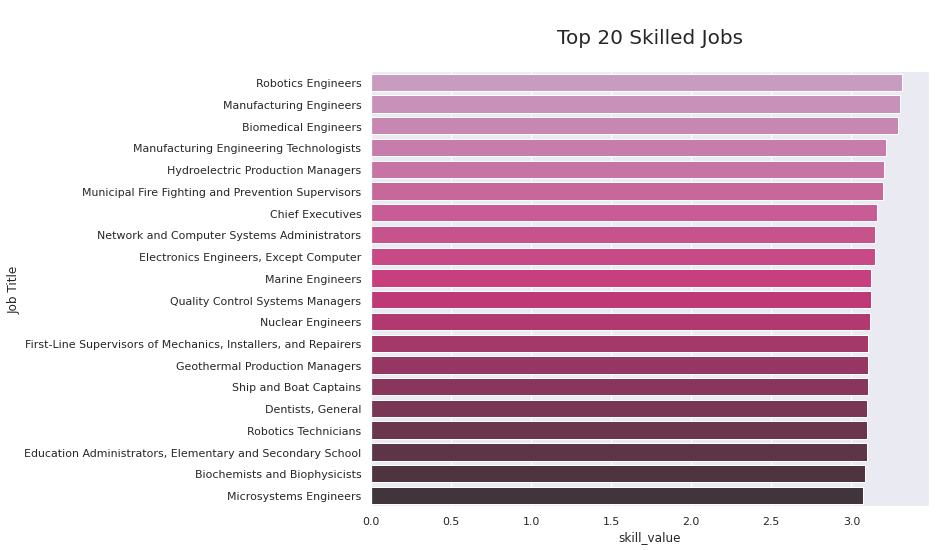

In [25]:
# Top 20 skilled jobs based on all skills
skills_grouped = pd.DataFrame(skills.groupby('title')['skill_value'].mean()).reset_index()
skills_grouped.sort_values(by='skill_value', ascending=False, inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x='skill_value', y='title',data=skills_grouped[:20], palette="PuRd_d")
plt.title('\nTop 20 Skilled Jobs\n', fontsize=20)
plt.ylabel('Job Title');

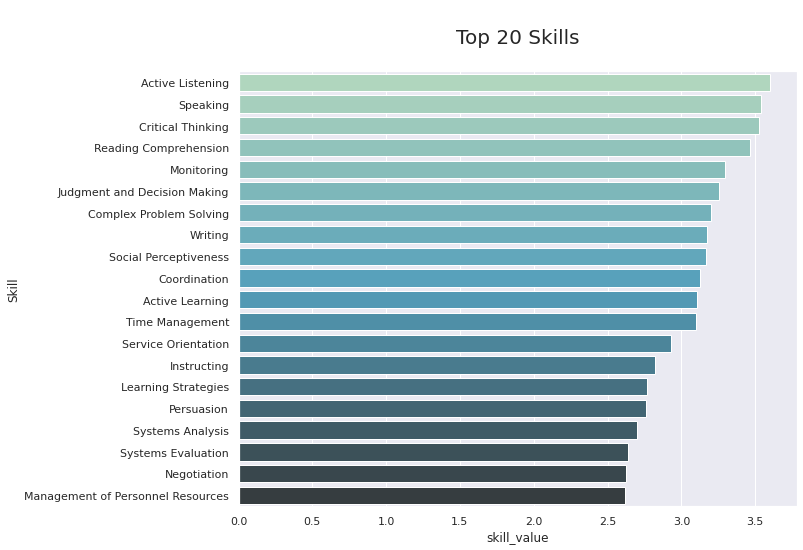

In [26]:
# Top 20 skills
skills_grouped2 = pd.DataFrame(skills.groupby('skill')['skill_value'].mean()).reset_index()
skills_grouped2.sort_values(by='skill_value', ascending=False, inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x='skill_value', y='skill', data=skills_grouped2[:20], palette="GnBu_d")
plt.title('\nTop 20 Skills\n', fontsize=20)
plt.ylabel('Skill');

<a id="tech_skills"></a>
### 4.3. Tech Skills

#### Data Checking & Cleaning

In [27]:
# Tech skills
tech_skills.head()

,O*NET-SOC Code,Title,Example,Commodity Code,Commodity Title,Hot Technology
0,11-1011.00,Chief Executives,Adobe Systems Adobe Acrobat,43232202,Document management software,Y
1,11-1011.00,Chief Executives,AdSense Tracker,43232306,Data base user interface and query software,N
2,11-1011.00,Chief Executives,Atlassian JIRA,43232201,Content workflow software,Y
3,11-1011.00,Chief Executives,Blackbaud The Raiser's Edge,43232303,Customer relationship management CRM software,N
4,11-1011.00,Chief Executives,ComputerEase Construction Accounting,43231601,Accounting software,N


In [28]:
# Check shape
tech_skills.shape

(29370, 6)

In [29]:
# Drop unnecessary columns
tech_skills = tech_skills.drop(columns=['O*NET-SOC Code', 'Commodity Code', 'Commodity Title'])

# Rename columns for simplicity
tech_skills = tech_skills.rename(columns={
    'Title':'title',
    'Example':'tech_skill', 
    'Hot Technology': 'hot_technology'
})

# Check for null values
tech_skills.isnull().sum()

title             0
tech_skill        0
hot_technology    0
dtype: int64

In [30]:
# Totla number of unique job titles
tech_skills['title'].nunique()

974

In [31]:
# Look at which jobs are in tech skills data but not in skills data
tech_skills[~tech_skills['title'].isin(skills['title'])]['title'].unique().reshape(-1, 1)

array([['Legislators'],
       ['Green Marketers'],
       ['Methane/Landfill Gas Collection System Operators'],
       ['Investment Underwriters'],
       ['Fuel Cell Technicians'],
       ['Methane/Landfill Gas Generation System Technicians']],
      dtype=object)

#### EDA

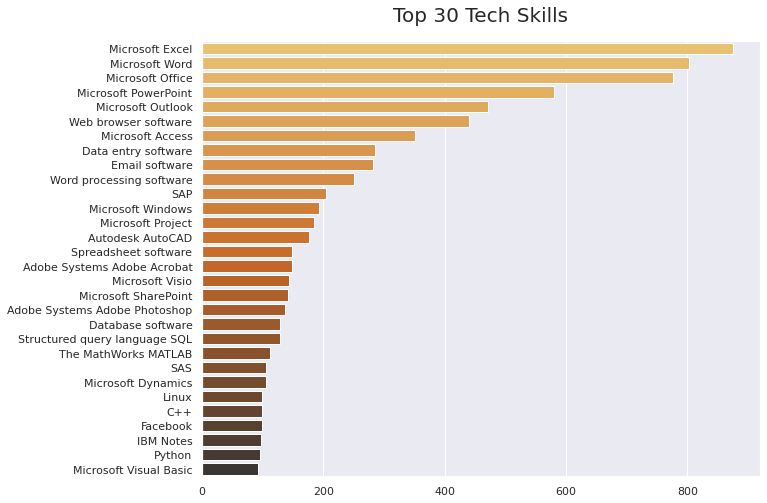

In [32]:
# Top 30 tech skills that appear in jobs
top_tech = tech_skills['tech_skill'].value_counts()[:30]

# Plot top tech skills
plt.figure(figsize=(10,8))
sns.barplot(x=top_tech.values, y=top_tech.index, palette="YlOrBr_d")
plt.title('Top 30 Tech Skills', fontsize=20, pad=20);

Here we can see that the Microsoft Office suite forms the top 5 tech skills. This is not surprising given how ubiquitous these software packages are. We can also see that Python makes it into the top 30 tech skills.

In [33]:
# A look at some of the jobs that involve python
tech_skills[tech_skills['tech_skill'] == "Python"][['title', 'tech_skill']][:20]

,title,tech_skill
423,Marketing Managers,Python
795,Computer and Information Systems Managers,Python
1971,Architectural and Engineering Managers,Python
3753,Management Analysts,Python
4242,Energy Auditors,Python
4310,Security Management Specialists,Python
5505,Financial Quantitative Analysts,Python
5696,Computer and Information Research Scientists,Python
5946,Computer Systems Analysts,Python
6064,Informatics Nurse Specialists,Python


In [34]:
# Check tech skills that are involved in Software Developers, Systems Software
tech_skills[tech_skills['title'] == 'Software Developers, Systems Software']

,title,tech_skill,hot_technology
6951,"Software Developers, Systems Software",A programming language APL,N
6952,"Software Developers, Systems Software",ABC Compiler,N
6953,"Software Developers, Systems Software",ABC: the AspectBench Compiler for AspectJ,N
6954,"Software Developers, Systems Software",Ada,N
6955,"Software Developers, Systems Software",Adobe Systems Adobe ActionScript,N
...,...,...,...
7217,"Software Developers, Systems Software",Web server software,N
7218,"Software Developers, Systems Software",Web service definition language WDSL,N
7219,"Software Developers, Systems Software",Win CE,N
7220,"Software Developers, Systems Software",Wind River VxWorks,N


For the title of Software Developers, Systems Sotware, we can see that there are 271 tech skills involved with positions that fall under this category.

In [35]:
# A look at how many of those skills are classified as 'hot' --> Might be better in a bar plot/histogram
tech_skills[
    (tech_skills['title'] == 'Software Developers, Systems Software') & (tech_skills['hot_technology'] == 'Y')
]

,title,tech_skill,hot_technology
6958,"Software Developers, Systems Software",Advanced business application programming ABAP,Y
6959,"Software Developers, Systems Software",AJAX,Y
6962,"Software Developers, Systems Software",Amazon Redshift,Y
6964,"Software Developers, Systems Software",Apache Cassandra,Y
6965,"Software Developers, Systems Software",Apache Groovy,Y
...,...,...,...
7208,"Software Developers, Systems Software",Unified modeling language UML,Y
7210,"Software Developers, Systems Software",UNIX,Y
7211,"Software Developers, Systems Software",UNIX Shell,Y
7215,"Software Developers, Systems Software",Virtual private networking VPN software,Y


The “hot_technology” column indicates requirements frequently included in employer job postings. We can see from the above table that out of the 271 tech skills involved in positions that fall under the category of Software Developers, Systems Software, 111 are classified as being 'hot', that's around 41%.

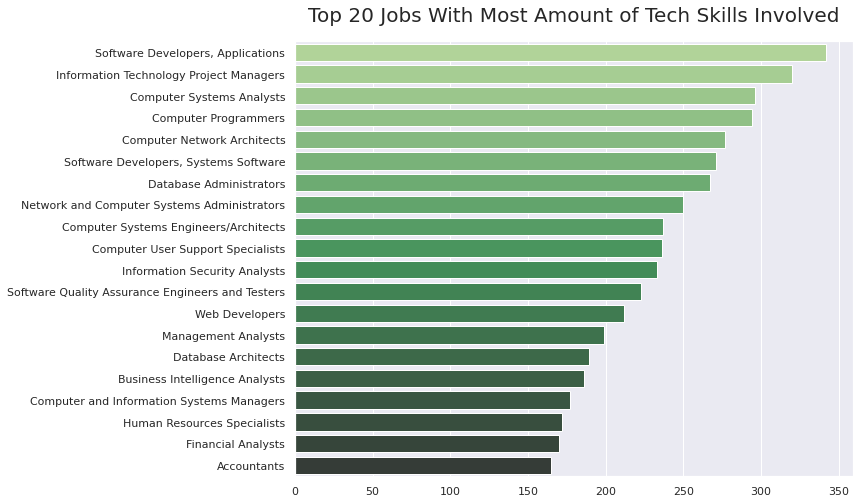

In [36]:
# Top 20 jobs which have the most amount of tech skills involved
top_tech_jobs = tech_skills['title'].value_counts()[:20]

# Plot top 20 jobs
plt.figure(figsize=(10,8))
sns.barplot(x=top_tech_jobs.values, y=top_tech_jobs.index, palette="YlGn_d")
plt.title('Top 20 Jobs With Most Amount of Tech Skills Involved', fontsize=20, pad=20);

In [37]:
# Create column for the amount of tech skills involved in each job
tech_skills['tech_skills_involved'] = tech_skills.groupby('title')['title'].transform('count')
pd.pivot_table(tech_skills, index='title', 
    values='tech_skills_involved').sort_values('tech_skills_involved', ascending=False).head()

,tech_skills_involved
title,
"Software Developers, Applications",342
Information Technology Project Managers,320
Computer Systems Analysts,296
Computer Programmers,294
Computer Network Architects,277


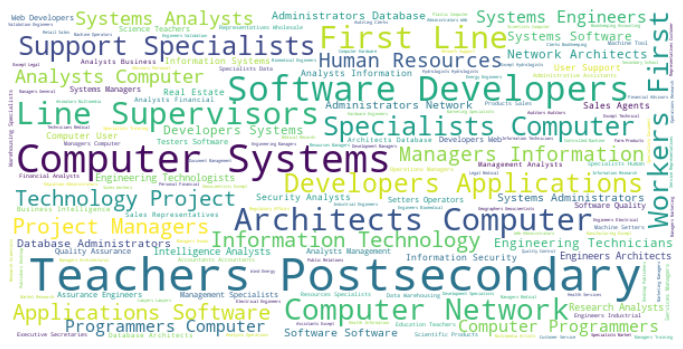

In [38]:
# Word cloud for job titles
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Set up text
text = " ".join(title for title in tech_skills['title'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS, random_state=1, background_color="white", width=600, height=300)
wordcloud.generate(text)

# Display the generated image
plt.figure(figsize=[12,12])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<a id="abilities_skills_tech"></a>
## 5. Analysis on Abilities, Skills, and Tech Skills
---

In [39]:
# Calculate the average score for all abilities for each job title
avg_abilities = abilities.groupby('title').mean().reset_index()

# Calculate the average score for all skills for each job title
avg_skills = skills.groupby('title').mean().reset_index()

# Calculate the average score for all tech skills for each job title
avg_tech = tech_skills.groupby('title').mean().reset_index()

# Merge all averages into single dataframe
all_avgs = avg_abilities.merge(avg_skills, on='title').merge(avg_tech, on='title')

# All individual averages
all_avgs.head()

,title,ability_value,skill_value,tech_skills_involved
0,Accountants,2.205000,2.579429,165
1,Actors,2.187885,2.118571,18
2,Actuaries,2.247692,2.782286,43
3,Acupuncturists,2.393269,2.463714,13
4,Acute Care Nurses,2.480577,2.921429,23


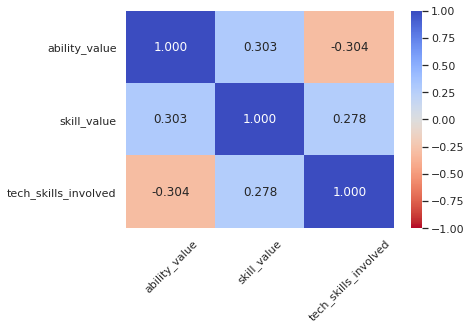

In [40]:
# Plot correlations
corr = sns.heatmap(all_avgs.corr(), cmap='coolwarm_r', vmin=-1, center=0, annot=True, fmt='.3f')
plt.yticks(rotation=0)
plt.xticks(rotation=45);

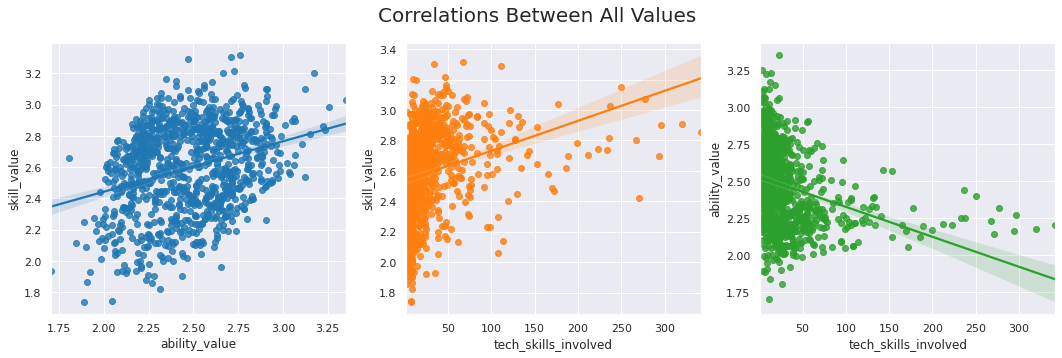

In [41]:
# Scatter plots for all features
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('Correlations Between All Values', fontsize=20)
sns.regplot(x='ability_value', y='skill_value', data=all_avgs, ax=axs[0], color=palette[0])
sns.regplot(x='tech_skills_involved', y='skill_value', data=all_avgs, ax=axs[1], color=palette[1])
sns.regplot(x='tech_skills_involved', y='ability_value', data=all_avgs, ax=axs[2], color=palette[2]);

In [42]:
# Jobs including all averages
all_avgs2 = all_avgs.copy()
all_avgs2['combined_avg'] = all_avgs2.mean(axis=1)
all_avgs2['ability_skill_avg'] = all_avgs2[['ability_value', 'skill_value']].mean(axis=1)
all_avgs2['skill_tech_skill_avg'] = all_avgs2[['skill_value', 'tech_skills_involved']].mean(axis=1)
all_avgs2.sort_values('combined_avg', ascending=False).head()

,title,ability_value,skill_value,tech_skills_involved,combined_avg,ability_skill_avg,skill_tech_skill_avg
850,"Software Developers, Applications",2.204038,2.858286,342,115.687441,2.531162,172.429143
464,Information Technology Project Managers,2.180000,2.906857,320,108.362286,2.543429,161.453429
167,Computer Systems Analysts,2.271538,2.904857,296,100.392132,2.588198,149.452429
165,Computer Programmers,2.163654,2.698857,294,99.620837,2.431255,148.349429
161,Computer Network Architects,2.319615,3.071429,277,94.130348,2.695522,140.035714


In [43]:
# Jobs based on combined averages
all_avgs2.sort_values('combined_avg', ascending=False).head(10)[['title', 'combined_avg']]

,title,combined_avg
850,"Software Developers, Applications",115.687441
464,Information Technology Project Managers,108.362286
167,Computer Systems Analysts,100.392132
165,Computer Programmers,99.620837
161,Computer Network Architects,94.130348
851,"Software Developers, Systems Software",91.854291
222,Database Administrators,90.679026
614,Network and Computer Systems Administrators,85.184678
168,Computer Systems Engineers/Architects,80.759652
169,Computer User Support Specialists,80.419441


Here we can see the top 10 job titles when we combine the averages for ability values, skill values and tech skills involved. It looks like all of them are tech positions but this could be because the tech skills involved column skews the scores for tech-related titles.

In [44]:
# Jobs based on averages of abilities and skills
all_avgs2.sort_values('ability_skill_avg', ascending=False).head(10)[['title', 'ability_skill_avg']]

,title,ability_skill_avg
26,"Airline Pilots, Copilots, and Flight Engineers",3.192214
600,Municipal Fire Fighting and Prevention Supervi...,3.186681
533,Manufactured Building and Mobile Home Installers,3.120168
835,Ship and Boat Captains,3.112832
368,Forest Firefighters,3.043313
796,Robotics Engineers,3.038228
601,Municipal Firefighters,3.035203
535,Manufacturing Engineers,3.006376
228,"Dentists, General",3.006055
797,Robotics Technicians,3.001827


When we take the averages of just the ability values and skill values, the top 10 positions change indicating that the tech skills involved column from the previous table was skewing the data in favour of tech positions. In this table, the top jobs comprise of positions that require a high level of responsibility such as pilots and ship captains.

In [45]:
# Jobs based on averages of skills and tech skills
all_avgs2.sort_values('skill_tech_skill_avg', ascending=False).head(10)[['title', 'skill_tech_skill_avg']]

,title,skill_tech_skill_avg
850,"Software Developers, Applications",172.429143
464,Information Technology Project Managers,161.453429
167,Computer Systems Analysts,149.452429
165,Computer Programmers,148.349429
161,Computer Network Architects,140.035714
851,"Software Developers, Systems Software",136.710571
222,Database Administrators,134.902000
614,Network and Computer Systems Administrators,126.575286
168,Computer Systems Engineers/Architects,120.014286
169,Computer User Support Specialists,119.407143


When we take the averages of the skill values and the tech skills, leaving out the ability values, we can see that the top results are the same as when we combined all values.

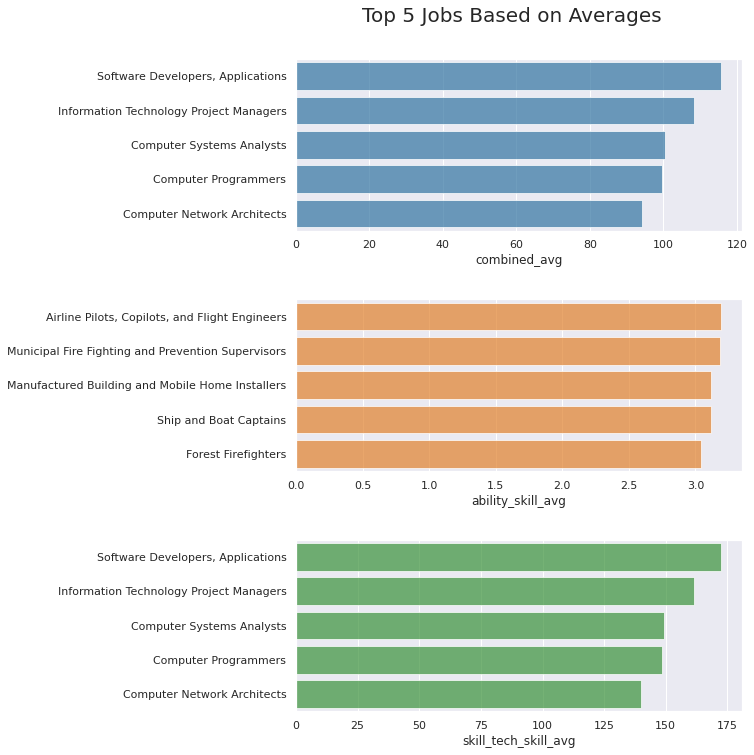

In [46]:
# Top 5 jobs for each average
combined_avg = all_avgs2.sort_values('combined_avg', ascending=False).head()[['title', 'combined_avg']]
ability_skill_avg = all_avgs2.sort_values('ability_skill_avg', ascending=False).head()[['title', 'ability_skill_avg']]
skill_tech_skill_avg = all_avgs2.sort_values('skill_tech_skill_avg', ascending=False).head()[['title', 'skill_tech_skill_avg']]

fig, axs = plt.subplots(3, 1, figsize=(8,12))
plt.suptitle('Top 5 Jobs Based on Averages', fontsize=20, y=0.94)
plt.subplots_adjust(hspace=0.4)

sns.barplot(x='combined_avg', y='title', data=combined_avg, color=palette[0], alpha=.7, ax=axs[0])
sns.barplot(x='ability_skill_avg', y='title', data=ability_skill_avg, color=palette[1], alpha=.7, ax=axs[1])
sns.barplot(x='skill_tech_skill_avg', y='title', data=skill_tech_skill_avg, color=palette[2], alpha=.7, ax=axs[2]);

for i in range(3):
    axs[i].set_ylabel('');

<a id="analysis_conclusion"></a>
## 6. Analysis Conclusion
---

From our analysis we have seen what some of the top jobs are for high ability, high skills and high tech skills. We have also seen some of the top abilities, skills and tech skills which are required in different jobs. It appears that when we analyse jobs based on ability values and skill values, the jobs that rank the highest are jobs which require a lot of responsibility such as pilots, captains and firefighters. However, when we include tech skills into the analysis, the highest ranking jobs comprise of mostly tech-related jobs such as software developers, computer programmers and network architects. It is clear that tech-skills are very important as we progress into the future, but our analysis shows us that occupations in high-responsibility areas that require both skills and ability are also very much needed.

<a id="classification"></a>
## 7. Classification
---

### Precision Score Summary

| <br><br>Models | <br>Best TfidfVectorized<br>Precision Score | <br>Best CountVectorized<br>Precision Score |
| :- | :-: | :-: |
| Naive Bayes | 0.50 | 0.52 |
| SVC (one-vs-one) | 0.43 | 0.52 |
| LinearSVC (one-vs-rest) | 0.49 | **0.55** |
| SGDClassifier | 0.41 | 0.49 |
| Logistic Regression | 0.49 | 0.54 |

#### Data Checking & Cleaning

In [47]:
# Read the data
soc_jobs = pd.read_csv('data/soc_codes_2018.csv')
soc_index = pd.read_csv('data/soc_2018_index_of_occupations.csv')
soc_structure = pd.read_csv('data/soc_structure_2018.csv')
soc_direct = pd.read_csv('data/soc_2018_direct_match_title_file.csv')
soc_missing = pd.read_csv('data/missing_codes.csv') # Codes that may be from SOC 2010
li_jobs = pd.read_csv('data/linkedin_job_titles.csv', names=['title'])
custom_stop_df = pd.read_csv('data/custom_stopwords.csv', names=['stopwords'])

In [48]:
# LinkedIn jobs
li_jobs.head()

,title
0,CFO
1,Head Cashier
2,Field Application Scientist
3,Senior Software Engineer
4,Owner


In [49]:
# Check for nulls
li_jobs.isnull().sum().sum()

1

In [50]:
# Remove nulls
li_jobs.dropna(inplace=True)

In [51]:
# Strip any whitespace if it is present
li_jobs['title'] = li_jobs['title'].str.strip()

In [52]:
# Check for numerical data in titles
li_jobs[li_jobs['title'].str.contains('\d+')]

,title
26,Level 2 Technical Support
32,Tier 3 Lync Team Systems Engineer
84,20000000
152,Tier 1 Agent
233,Motor Transport Operator 3531
318,Software Quality Assurance Analyst 1
462,92Y Supply Specialist
482,3D Artist


In [53]:
# Remove numerical data
li_jobs['title'] = li_jobs['title'].str.replace('\d+', '')

In [54]:
# Check for punctuation in titles
li_jobs[li_jobs['title'].str.contains('[^\w\s]')]

,title
17,R&D Engineer
18,Sr. IT Recruiter
22,AV/IT Support Admin
24,Greensboro/Winston
35,Sr. Systems Administrator
38,Owner/Travel Agent
51,C++ Software Engineer
61,Systems Programmer/Web Developer
69,Technical & Operations Manager
72,UX/UI Design and Front


In [55]:
# Remove punctuation 
li_jobs['title'] = li_jobs['title'].str.replace('[^\w\s]', '')

In [56]:
# Make all titles lowercase 
li_jobs['title'] = li_jobs['title'].str.lower()

In [57]:
# Check data
li_jobs.head()

,title
0,cfo
1,head cashier
2,field application scientist
3,senior software engineer
4,owner


In [58]:
# Check for nulls in any of the soc dataframes
df_list = [soc_jobs, soc_index, soc_direct, soc_structure, soc_missing]
df_list_str = ['soc_jobs', 'soc_index', 'soc_direct', 'soc_structure', 'soc_missing']
print('Null Values')
print('-'*30)
for i, df in enumerate(df_list):
    print(f'\n{df_list_str[i]}: {df.isnull().sum().sum()} ({round(df.isnull().sum().sum()/df.shape[0]*100,2)}%)')

Null Values
------------------------------

soc_jobs: 0 (0.0%)

soc_index: 281 (0.85%)

soc_direct: 0 (0.0%)

soc_structure: 578 (40.0%)

soc_missing: 0 (0.0%)


In [59]:
# Remove null rows from soc_structure
soc_structure = soc_structure.dropna().reset_index(drop=True)

In [60]:
# Rename all columns before concatenating
for df in df_list:
    df.columns = ['code', 'title']

In [61]:
# Create ONET job df for later to compare with predictions
soc_jobs_onet = soc_jobs.copy()
soc_jobs_onet = pd.concat([soc_jobs_onet, soc_missing])
soc_jobs_onet['code'] = soc_jobs_onet['code'].str.strip()
soc_jobs_onet['title'] = soc_jobs_onet['title'].str.strip()
soc_jobs_onet['code'] = soc_jobs_onet['code'].str.replace('-', '')
soc_jobs_onet = soc_jobs_onet.drop_duplicates()

In [62]:
# Concat all tables
soc_final = pd.concat(df_list, ignore_index=True)

In [63]:
# Look at final data
soc_final

,code,title
0,11-1011,Chief Executives
1,11-1011,Chief Executives
2,11-1021,General and Operations Managers
3,11-1031,Legislators
4,11-2011,Advertising and Promotions Managers
...,...,...
42122,51-9020,"Crushing, Grinding, Polishing, Mixing, and Ble..."
42123,51-9080,Dental and Ophthalmic Laboratory Technicians a...
42124,51-9120,Painting Workers
42125,53-2020,Air Traffic Controllers and Airfield Operation...


In [64]:
# Check for nulls
soc_final[soc_final['code'].isna()]

,code,title
33842,NaN,"Account representative See ""Account executive"""
33843,NaN,"Actors agent See ""Booking agent"""
33844,NaN,"Administrative officer See ""Official"""
33845,NaN,"Administrator See ""Official"""
33846,NaN,"Aide teachers See ""Teachers aide"""
...,...,...
42064,NaN,Military Officer Special and Tactical Operatio...
42073,NaN,First-Line Enlisted Military Supervisors
42074,NaN,First-Line Enlisted Military Supervisors
42078,NaN,Military Enlisted Tactical Operations and Air/...


In [65]:
# Remove null rows
soc_final.dropna(inplace=True)

In [66]:
# Strip any whitespace if it is present
soc_final['title'] = soc_final['title'].str.strip()
soc_final['code'] = soc_final['code'].str.strip()

In [67]:
# Remove hyphens from code
soc_final['code'] = soc_final['code'].str.replace('-','')

In [68]:
# Remove duplicate job titles
soc_final.drop_duplicates(subset=['title'], inplace=True)

In [69]:
# Reset index
soc_final = soc_final.reset_index(drop=True)

In [70]:
# Check new shape
soc_final.shape

(35708, 2)

In [71]:
# Convert to lower case
soc_final['title'] = soc_final['title'].str.lower()

In [72]:
# Remove numbers from titles
soc_final['title'] = soc_final['title'].str.replace('\d+', '')

In [73]:
# Remove punctuation 
soc_final['title'] = soc_final['title'].str.replace('[^\w\s]','')

In [74]:
# Check data
soc_final.head(20)

,code,title
0,111011,chief executives
1,111021,general and operations managers
2,111031,legislators
3,112011,advertising and promotions managers
4,112021,marketing managers
5,112022,sales managers
6,112032,public relations managers
7,112033,fundraising managers
8,113012,administrative services managers
9,113013,facilities managers


In [75]:
# Drop row that have letters in the codes
soc_final = soc_final[~soc_final['code'].str.contains('[^0-9]')]

In [76]:
# Check number of unique
soc_final['code'].nunique()

964

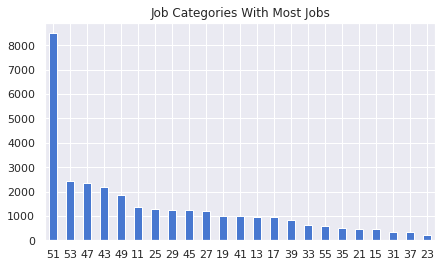

In [77]:
# Calculate number of jobs for each main job category group
soc_copy = soc_final.copy()
soc_copy['category'] = soc_copy['code'].str[:2]
soc_copy['category'].value_counts().plot(kind='bar',figsize=(7,4), 
                                         title='Job Categories With Most Jobs', 
                                         rot=0);

**Top 5 Categories:**

* **51** - Production Occupations
* **53** - Transportation and Material Moving Occupations
* **47** - Construction and Extraction Occupations
* **43** - Office and Administrative Support Occupations
* **49** - Installation, Maintenance, and Repair Occupations

In [78]:
# Imports and setup
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/dan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
# Make copy to view tokenized words
soc_tok = soc_final.copy()

In [80]:
# Tokenize words
soc_tok['tokenized'] = soc_tok['title'].apply(word_tokenize)

# Unigrams for each title
soc_tok['unigrams'] = soc_tok.apply(lambda row: len(row['tokenized']), axis=1)

In [81]:
# Check data
soc_tok.head()

,code,title,tokenized,unigrams
0,111011,chief executives,"[chief, executives]",2
1,111021,general and operations managers,"[general, and, operations, managers]",4
2,111031,legislators,[legislators],1
3,112011,advertising and promotions managers,"[advertising, and, promotions, managers]",4
4,112021,marketing managers,"[marketing, managers]",2


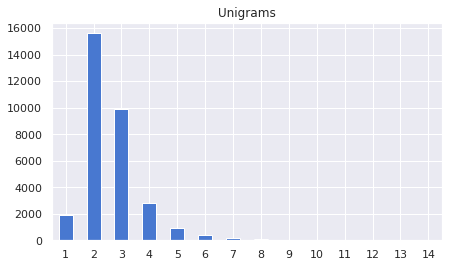

In [82]:
# Visualise most common amount of unigrams
soc_tok['unigrams'].value_counts().sort_index().plot(kind='bar',
                                                       figsize=(7,4), 
                                                       title='Unigrams', 
                                                       rot=0);

In [83]:
# Look at job titles which have over 12 words
soc_tok[soc_tok['unigrams'] > 12][['code', 'title', 'unigrams']]

,code,title,unigrams
255,253011,adult basic education adult secondary educatio...,13
715,514033,grinding lapping polishing and buffing machine...,14
7239,292061,nurse other specified or ns high school diplom...,14
7240,292061,patient care exc nursing high school diploma o...,13
14436,472171,ironworker ns activities such as laying reinfo...,14
14448,472171,steelworker ns activities such as laying reinf...,14
35537,553015,air defense command control communications com...,13
35551,553015,global command and control system common opera...,13


In [84]:
# Collecting all stopwords that will be used

# Stopwords from NLTK
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk_stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/dan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
# Adding nltk stopwords to df
nltk_stop_df = pd.DataFrame(nltk_stop, columns=['stopwords'])
nltk_stop_df

,stopwords
0,i
1,me
2,my
3,myself
4,we
...,...
174,weren't
175,won
176,won't
177,wouldn


In [86]:
# Stopwords from sklearn
from sklearn.feature_extraction import text
sk_stop = text.ENGLISH_STOP_WORDS
sk_stop = [word for word in sk_stop]
sk_stop_df = pd.DataFrame(sk_stop, columns=['stopwords'])
sk_stop_df

,stopwords
0,bottom
1,amount
2,somehow
3,thereby
4,give
...,...
313,have
314,down
315,of
316,less


In [87]:
# Custom stopwords
custom_stop_df

,stopwords
0,i
1,me
2,my
3,myself
4,we
...,...
906,excepts
907,except
908,excepting
909,exes


These custom stopwords were collected by searching the internet.

In [88]:
# Concat all stopwords and extract unique to eliminate duplicates
all_stopwords_list = [nltk_stop_df, sk_stop_df, custom_stop_df]
all_stopwords = pd.concat(all_stopwords_list, ignore_index=True)
all_stopwords['stopwords'] = all_stopwords['stopwords'].str.strip()
all_stopwords = all_stopwords['stopwords'].unique().tolist()
all_stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [89]:
# Removing stopwords from soc_final
soc_final['title'] = soc_final['title'].apply(
    lambda x: ' '.join([item for item in x.split() if item not in all_stopwords])
)

In [90]:
# Data with stopwords removed
soc_final.head(10)

,code,title
0,111011,chief executives
1,111021,general operations managers
2,111031,legislators
3,112011,advertising promotions managers
4,112021,marketing managers
5,112022,sales managers
6,112032,public relations managers
7,112033,fundraising managers
8,113012,administrative services managers
9,113013,facilities managers


<a id="model_training"></a>
## 8. Model Training
---

Because this is a multiclass classification task, we will have to pick models that account for this.

In [91]:
# Imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import precision_score

In [92]:
# Function for training models
def train_models(model_name, X, y, model):
    
    '''
    Takes in model name, X, y and model as arguments and trains one model on data which is vectorized
    by TfidfVectorizer and another model on data which is vectorized by CountVectorizer. Prints
    Average precision score for both models.
    '''
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Make pipelines
    pipe_tv = Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', model),
    ])

    pipe_cv = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', model),
    ])

    # Fit data
    pipe_tv.fit(X_train, y_train)
    pipe_cv.fit(X_train, y_train)

    # Predictions
    y_pred_tv = pipe_tv.predict(X_test)
    y_pred_cv = pipe_cv.predict(X_test)

    # Average precision 
    avg_precision_tv = precision_score(y_test, y_pred_tv, average='micro')
    print(f"{model_name} Precision Score (TfidfVectorizer) -> ", avg_precision_tv)

    avg_precision_cv = precision_score(y_test, y_pred_cv, average='micro')
    print(f"{model_name} Precision Score (CountVectorizer) -> ", avg_precision_cv)

In [93]:
# Isolate features and labels
X = soc_final['title']
y = soc_final['code']

### Naive Bayes

We will use the Naive Bayes Classifier first as it is usually a good baseline model.

In [94]:
# Find optimal parameters for Naive Bayes and train models
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ]}
cv = [(slice(None), slice(None))]
nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=cv, verbose=0)
train_models('Naive Bayes', X, y, nb_grid)

Naive Bayes Precision Score (TfidfVectorizer) ->  0.5019564877132572
Naive Bayes Precision Score (CountVectorizer) ->  0.519956174675223


### SVC (one-vs-one)

We can use GridSearchCV here to identify optimal parameters for the SVC model, however, due to time constraints and limited computational power, we will opt for a model with general parameters.

In [95]:
# # Find optimal parameters for SVC and train models
# params = {'C':[1,10], 'gamma':[1,0.1,0.001]}
# cv = [(slice(None), slice(None))]
# svc_grid = GridSearchCV(SVC(), param_grid=params, n_jobs=-1, cv=cv, verbose=0)
# train_models('SVC', X, y, svc_grid)

In [96]:
# Train SVC models
svc = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
train_models('SVC', X, y, svc)

SVC Precision Score (TfidfVectorizer) ->  0.4251056503365159
SVC Precision Score (CountVectorizer) ->  0.5169823133510721


### LinearSVC (one-vs-rest)

Again, we could use GridSearchCV here as well to tune the parameters of the LinearSVC model, however, for this model there are not many parameters that can be tuned and so we will use the model with the default parameters.

In [97]:
# Train LinearSVC models
linsvc = LinearSVC(random_state=1)
train_models('LinearSVC', X, y, linsvc)

LinearSVC Precision Score (TfidfVectorizer) ->  0.4941305368602285
LinearSVC Precision Score (CountVectorizer) ->  0.5453122554390358


### SGDClassifier

For the SGDClassifier, we will use GridSearchCV to find the optimal parameters for the parameters we have specified. Given more time and computational power, we could extend these parameters to improve the model.

In [98]:
# Find optimal parameters for SGD and train models
params = {'alpha': [1e-4, 1e-3, 1e-2, 1e1],
          'tol':[None],
          'max_iter':[5]
}
cv = [(slice(None), slice(None))]
svc_grid = GridSearchCV(SGDClassifier(random_state=42), param_grid=params, n_jobs=-1, cv=cv, verbose=0)
train_models('SGD', X, y, svc_grid)

SGD Precision Score (TfidfVectorizer) ->  0.4147753952105181
SGD Precision Score (CountVectorizer) ->  0.4922523086555016


### Logistic Regression

Finally, we will use a Logistic Regression mode using the one-vs-the-rest (OvR) strategy.

In [99]:
# Train Logistic Regression models
lr = LogisticRegression(C=4.0, penalty='l2')
ovr = OneVsRestClassifier(lr)
train_models('Logistic Regression', X, y, ovr)

Logistic Regression Precision Score (TfidfVectorizer) ->  0.4883393332289873
Logistic Regression Precision Score (CountVectorizer) ->  0.5442166223196119


<a id="model_summary"></a>
## 9. Model Summary
---

Our training shows that using CountVectorized data is better than using TfidfVectorized data. This is to be expected as the text is very short and thus it is hard to calculate accurate term frequency. Our training also shows that the LinearSVC model with CountVectorized data performs the best out of all of our models, therefore we will use that model to make our predictions on the LinkedIn job titles.

| <br><br>Models | <br>Best TfidfVectorized<br>Precision Score | <br>Best CountVectorized<br>Precision Score |
| :- | :-: | :-: |
| Naive Bayes | 0.50 | 0.52 |
| SVC (one-vs-one) | 0.43 | 0.52 |
| LinearSVC (one-vs-rest) | 0.49 | **0.55** |
| SGDClassifier | 0.41 | 0.49 |
| Logistic Regression | 0.49 | 0.54 |

<a id="linkedin_predictions"></a>
## 10. Predicting LinkedIn Job Titles

In [100]:
# Train model and get precision score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize data
count_vect = CountVectorizer()
X_train_cvect = count_vect.fit_transform(X_train)
X_test_cvect = count_vect.transform(X_test)

# Fit data
linsvc = LinearSVC(random_state=1)
linsvc = linsvc.fit(X_train_cvect, y_train)

# Predict the labels on test set
linsvc_pred = linsvc.predict(X_test_cvect)

# Average precision
avg_precision = precision_score(y_test, linsvc_pred, average='micro')
print("LinearSVC Precision Score (CountVectorizer) -> ", avg_precision)

LinearSVC Precision Score (CountVectorizer) ->  0.5453122554390358


In [101]:
# Compare predictions to real values
linsvc_compare = list(zip(y_test, linsvc_pred))
linsvc_df = pd.DataFrame(linsvc_compare, columns=['true_values','predictions'])
linsvc_df[linsvc_df['true_values'] == linsvc_df['predictions']].loc[0:20]

,true_values,predictions
0,292031,292031
2,474021,474021
7,514050,514050
8,273043,273043
11,474091,474091
13,291249,291249
14,251032,251032
16,551015,551015
17,113031,113031
19,291071,291071


In [102]:
# Predict LinkedIn titles
li_cvect = count_vect.transform(li_jobs['title'])
linsvc_pred_li = linsvc.predict(li_cvect)
li_pred_df = pd.concat([li_jobs, pd.DataFrame(linsvc_pred_li, columns=['code'])], axis=1)
final_li_results = li_pred_df.merge(soc_jobs_onet, how='left', on=('code'), suffixes=('_input', '_predicted'))
final_li_results.loc[:30]

,title_input,code,title_predicted
0,cfo,111011,Chief Executives
1,head cashier,412010,Cashiers
2,field application scientist,434061,"Eligibility Interviewers, Government Programs"
3,senior software engineer,151252,Software Developers
4,owner,533030,Driver/Sales Workers and Truck Drivers
5,library technical assistant ii,254031,Library Technicians
6,transit operator,439071,"Office Machine Operators, Except Computer"
7,inside sales representative,414010,"Sales Representatives, Wholesale and Manufactu..."
8,line cook,352014,"Cooks, Restaurant"
9,customer service team manager,512092,Team Assemblers


Here, we can see how the classifier performs on the random LinkedIn titles. For some titles, the classifier does well at prediciting what the O\*NET equivalent classification should be. However, for other titles, the prediction is off. For example, barista is classified as a Shoe and Leather Workers occupation.

In [103]:
# Pickle model
import pickle
filename = 'classify_li_jobs.pkl'
pickle.dump(linsvc, open(filename, 'wb'))

# # Reload model
# loaded_model = pickle.load(open(filename, 'rb'))

<a id="conclusion_and_recommendations"></a>
## 11. Conclusion and Recommendations
---

Overall, our classifier is not great. It is able to predict and match some of the titles accurately but with a precision score of only 0.55, it can be improved much further.

Recommendations for improving the model:

* Play around with the data pre-processing steps and see how it effects the precision.
* Explore other word vectorization techniques more extensively such as Word2Vec.
* Try more parameter tuning with the help of GridSearchCV.
* Try other classification algorithms and even neural networks.
* Try removing different combinations of stopwords.
* Collecting more labeled data. This will increase the number of some of the categories which will allow us to use cross-validation.
* Combining classifiers to create classifier chains.

##### Potential Avenue for Improvement

Given more time and more computing power, we could try to utilise different word vectorization and word embedding techniques such as Word2Vec. For this method, once all of the titles are tokenized, each word would be turned into a vector. An example of this can be shown below.

In [104]:
from gensim.models import Word2Vec

# Train model
titles_list = soc_final['title'].values
w2v_titles = [word_tokenize(title) for title in titles_list]
w2v_model = Word2Vec(sentences=w2v_titles, size=32, workers=4, min_count=1)

# Make copy of df
soc_w2v = soc_final.copy()

# Apply word2vec
title_vectors = pd.DataFrame()
for title in soc_w2v['title']:
    temp = pd.DataFrame()
    for word in title.split(' '):
        if word != '':
            word_vec = w2v_model.wv[word]
            temp = temp.append(pd.Series(word_vec), ignore_index=True)
        else:
            pass
    title_vector = temp.mean()
    title_vectors = title_vectors.append(title_vector, ignore_index=True)
    
# Show vectorized df
title_vectors

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.140928,0.255284,0.229755,0.249367,0.120620,0.176225,0.175716,0.254596,-0.024906,0.028470,...,0.287216,-0.037221,0.028204,0.081069,0.417323,-0.016918,0.178441,-0.257423,0.244789,0.234334
1,-0.200032,0.379661,0.326741,0.387009,0.193847,0.248424,0.238067,0.353745,-0.023978,0.025708,...,0.422338,-0.087882,0.027754,0.125629,0.585833,0.008778,0.259200,-0.359916,0.341620,0.347504
2,0.011147,-0.008862,0.000427,-0.015251,-0.013074,0.013123,0.001084,0.015505,0.005538,-0.009223,...,-0.001094,-0.007686,0.013283,0.004454,0.014504,-0.007777,0.011592,-0.010133,-0.012639,-0.013629
3,-0.065960,0.137596,0.106529,0.126958,0.068252,0.088316,0.078108,0.126512,-0.013989,-0.003934,...,0.133656,-0.038469,0.013583,0.044381,0.209027,0.005689,0.098496,-0.126617,0.114939,0.126958
4,-0.090372,0.160759,0.135106,0.168692,0.082964,0.111191,0.087912,0.152334,-0.023725,0.008993,...,0.174160,-0.039762,0.017429,0.048281,0.243765,-0.000375,0.106965,-0.145381,0.142715,0.146179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31940,-0.073922,0.147711,0.130894,0.148237,0.074512,0.100083,0.100918,0.134223,-0.011096,0.009889,...,0.165146,-0.022328,0.011524,0.057918,0.247242,0.006505,0.103362,-0.140932,0.139783,0.144367
31941,-0.145064,0.293305,0.241414,0.278560,0.144102,0.192987,0.177126,0.267508,-0.026541,0.023915,...,0.313894,-0.058187,0.031845,0.102775,0.460925,-0.008933,0.182636,-0.268527,0.265253,0.269129
31942,-0.174841,0.355255,0.309903,0.356636,0.186607,0.248095,0.223160,0.325554,-0.031929,0.025126,...,0.380321,-0.064460,0.032410,0.130908,0.576659,-0.004794,0.246469,-0.354040,0.322568,0.342694
31943,-0.149633,0.283613,0.253541,0.283816,0.139135,0.190751,0.184424,0.270823,-0.017258,0.021333,...,0.317155,-0.059215,0.023894,0.107894,0.457997,-0.003612,0.195385,-0.277813,0.261354,0.274105


In the future, it would be interesting to see if we could improve our models by training them on this type of vectorized data.

**[Back to Top](#top)** <br>